In [1]:
pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.8-cp37-none-any.whl size=73280 sha256=3e2f862f8791e6e7467299969499a94648233e43cffb34fbf4873bf7254c1a4d
  Stored in directory: C:\Users\julii\AppData\Local\pip\Cache\wheels\94\a7\09\68dc83c7c14fdbdf5d3f2b2da5b87e587bfc1e85df69b1130c
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6774 sha256=47bcd349f14f8c11f4034debde1a844d4b7edd43cd78942c9e012646e49b58da
  Stored in directory: C:\Users\julii\AppData\Local\pip\Cache\wheels\67\b8\ba\041548f30a6fc058c9b3f79a5b7b6aea925a15dd1e5c4992a4
  Created wheel for slugify: filename=slugify-0.0.1-cp37-none-any.whl size=1915 sha256=f5f5e4c99d7ee4e05aaae6e45b4302d5fd4a0fecc6093204ad9a9af85f4b8987
  Stored in directory: C:\Users\julii\AppData\Local\pip\Cache\wheels\f9\68\7b\b797d07992b6c7ef1666a59cc79f45fb37aab4344efa6cc3e1
Successfully built kaggle python-slugify slugify
Note: you may need to restart the kernel to use updated packages.


In [5]:
import kaggle 
!kaggle competitions download -c titanic



  0%|          | 0.00/34.1k [00:00<?, ?B/s]
100%|##########| 34.1k/34.1k [00:00<00:00, 5.27MB/s]


In [6]:
!unzip "test.csv.zip"
!unzip "train.csv.zip"

unzip:  cannot find either test.csv.zip or test.csv.zip.zip.
unzip:  cannot find either train.csv.zip or train.csv.zip.zip.


In [7]:
!unzip "titanic.zip"

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [65]:
import pandas as pd
import seaborn as sns

X_test=pd.read_csv("test.csv")
X=pd.read_csv("train.csv")

In [2]:
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
y=X["Survived"]

In [4]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [21]:
X.info()
#to check nulls
features=["Pclass","Sex","Age","SibSp","Parch","Embarked"]
X_train=X[features]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
X[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [45]:
X_test[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


C:\Users\julii\Anaconda3_1\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\julii\Anaconda3_1\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


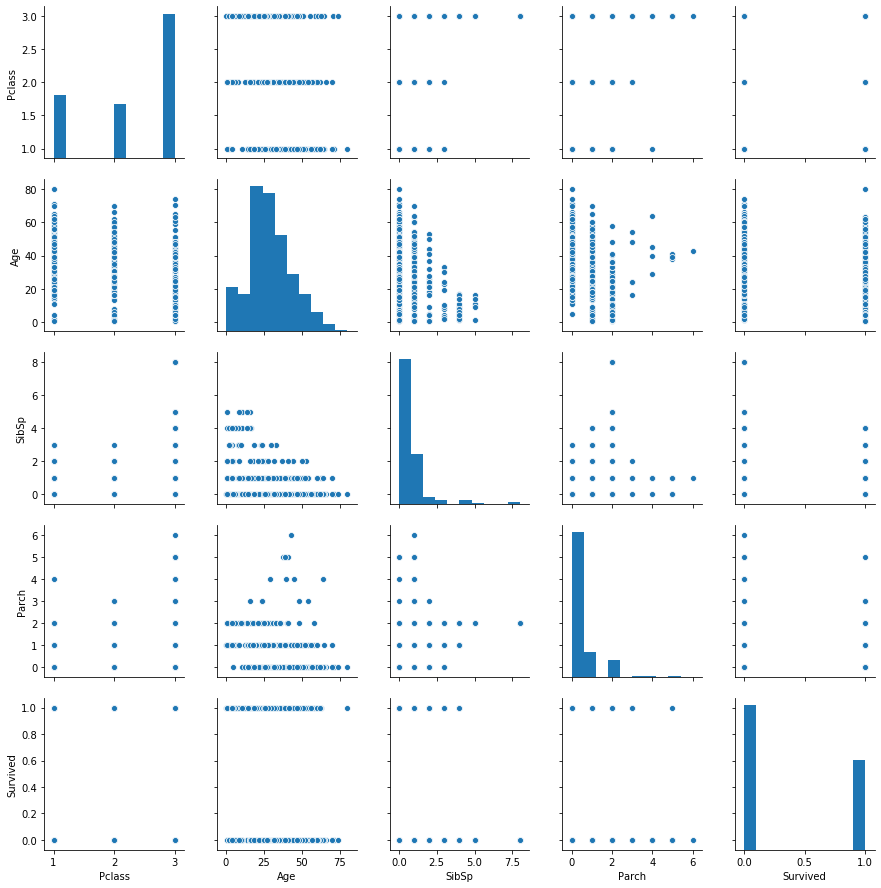

In [31]:
sns.pairplot(X[features])
#pclass is cat, survived is also cat
#make age to cat
#pairch? how many what
#Fare?

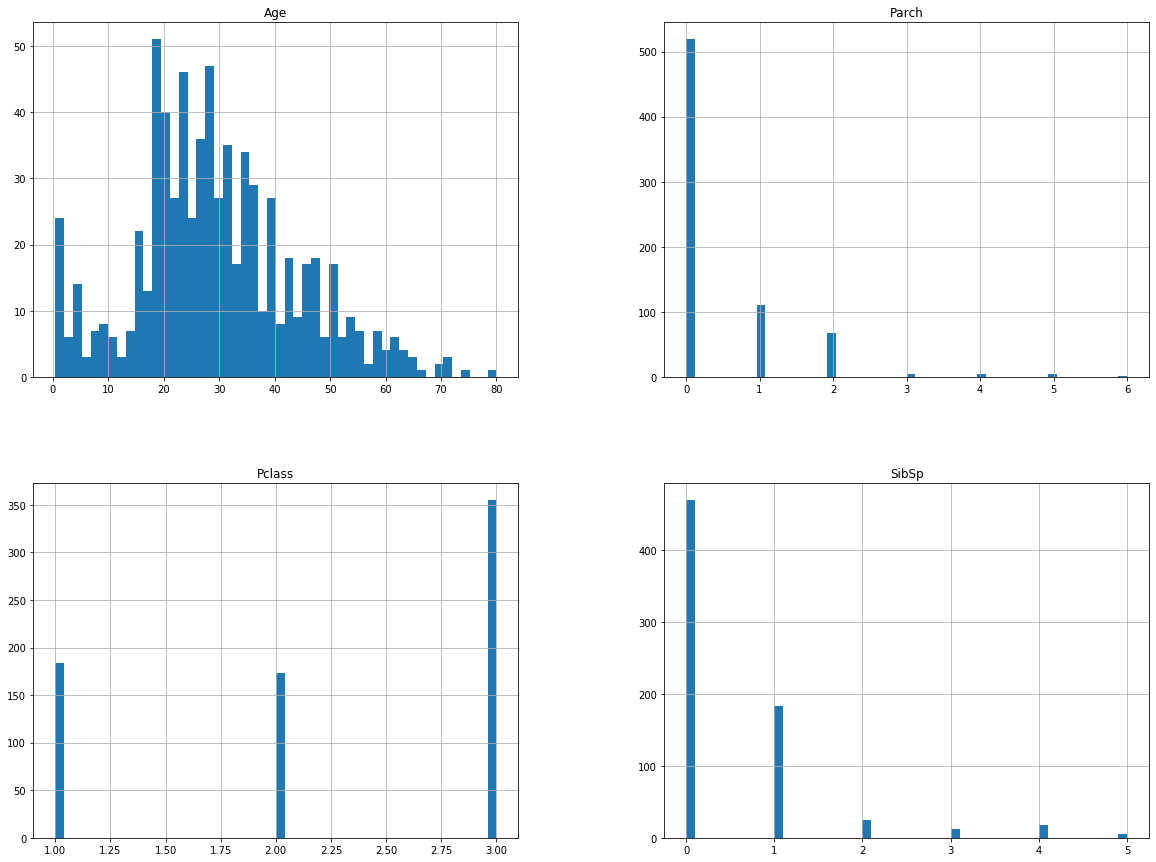

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
X_train.hist(bins=50, figsize=(20,15))
plt.show()

In [32]:
#preprocessing categorical columns
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
cat=["Pclass","Sex","Embarked"]
X_train_cat=X_train[cat]
X_train_cat_1hot=cat_encoder.fit_transform(X_train_cat)
X_train_cat_1hot

<712x8 sparse matrix of type '<class 'numpy.float64'>'
	with 2136 stored elements in Compressed Sparse Row format>

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
cat=["Pclass","Sex","Embarked"]
num=["Age","SibSp","Parch"]
num_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])


cat_pipeline = Pipeline([
#('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline=ColumnTransformer([
     ("num",num_pipeline,num),
     ("cat",cat_pipeline,cat)
 ])

In [66]:
X_0=X.dropna(subset=cat)
X_train=X_0[features]
y=X_0["Survived"]
X_train_prepared=full_pipeline.fit_transform(X_train)

In [67]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prepared,y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
X_train_prepared.shape

(889, 11)

(418, 11)

In [69]:
X_test_prepared=full_pipeline.fit_transform(X_test[features])
X_test_prepared.shape

(418, 11)

In [71]:
predictions=sgd_clf.predict(X_test_prepared)

In [74]:
output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission_0.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [73]:
#testin Random Forest w my prepared data

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train_prepared, y)
predictions = model.predict(X_test_prepared)


In [77]:
y_0 = X["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X_0 = pd.get_dummies(X[features])
X_test_0 = pd.get_dummies(X_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_0, y_0)
predictions = model.predict(X_test_0)

output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission_1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
